In [1]:
from climada.hazard import TCTracks

In [20]:
# List of Hurricanes of interest to be used for track synthesis
track_ids = ['1934324N23299', '1954278N12302', '1909313N11279', '1948143N17287', '1963272N09314']

2025-02-03 16:57:46,128 - climada.hazard.tc_tracks - WARNING - `correct_pres` is deprecated. Use `estimate_missing` instead.
2025-02-03 16:57:46,312 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /home/aesgeorges/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


/home/aesgeorges/anaconda3/envs/climada/lib/python3.11/site-packages/climada/hazard/tc_tracks.py:614: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ibtracs_ds.dims['storm'] == 0:


<GeoAxes: >

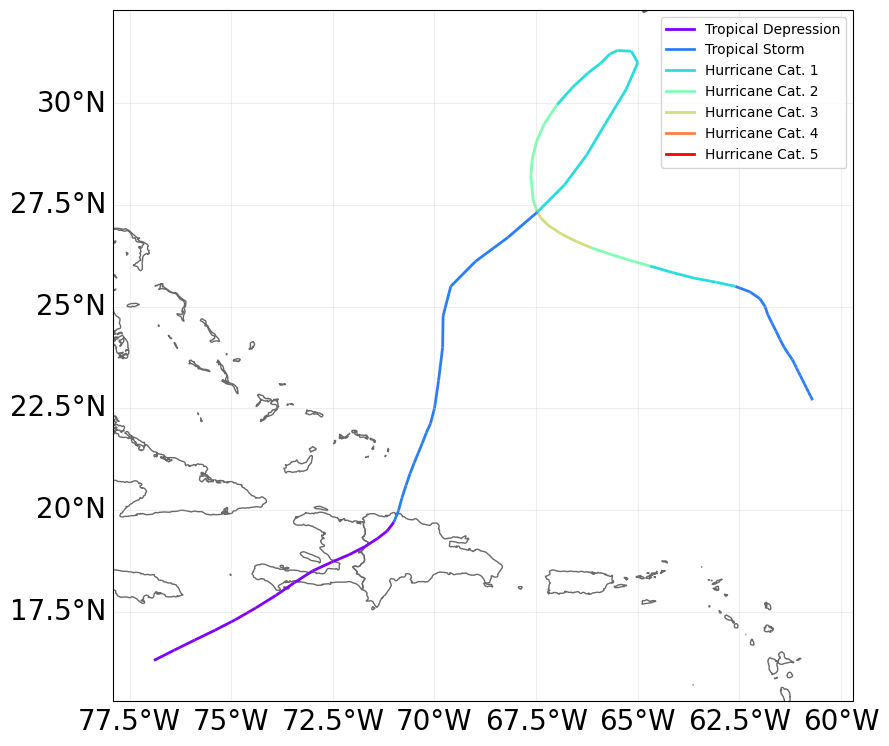

In [34]:
test = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='1934324N23299', correct_pres=True)
test.plot()

In [21]:
track_ids[0:]

['1934324N23299',
 '1954278N12302',
 '1909313N11279',
 '1948143N17287',
 '1963272N09314']

In [35]:
def track_library(ids):
    """Return a TCTracks object with the tracks of the hurricanes of interest."""
    tracks = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id=ids, correct_pres=True)
    return tracks

2025-02-03 16:58:10,034 - climada.hazard.tc_tracks - WARNING - `correct_pres` is deprecated. Use `estimate_missing` instead.
2025-02-03 16:58:10,214 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file /home/aesgeorges/climada/data/IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


/home/aesgeorges/anaconda3/envs/climada/lib/python3.11/site-packages/climada/hazard/tc_tracks.py:614: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ibtracs_ds.dims['storm'] == 0:


<GeoAxes: >

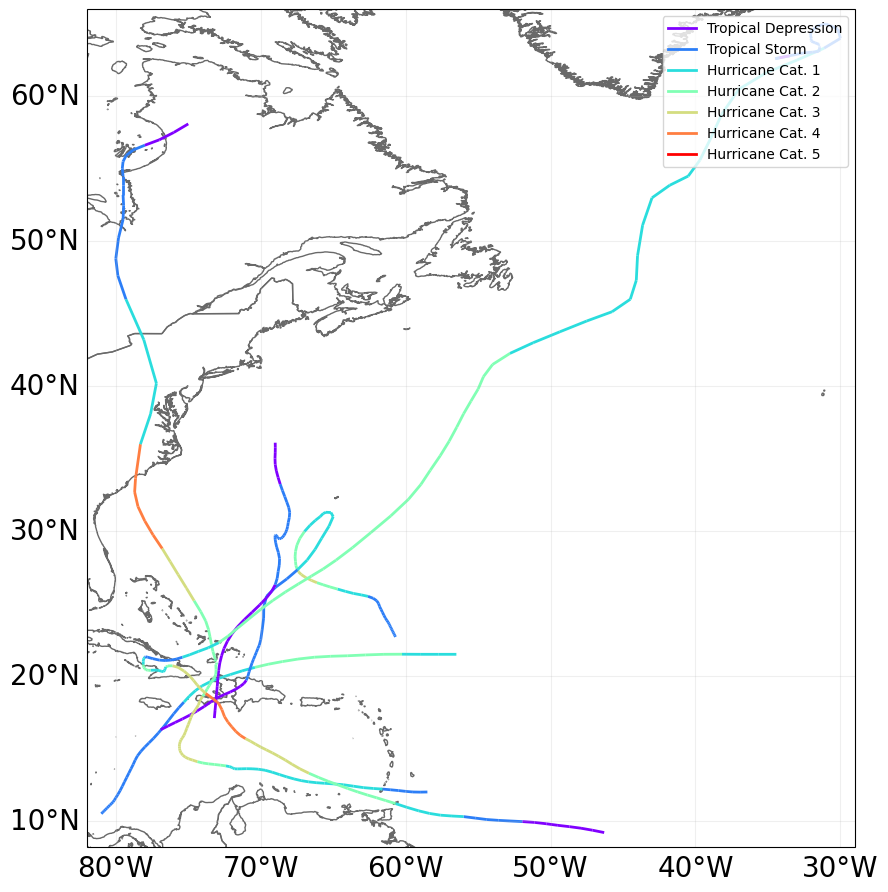

In [36]:
tracks = track_library(track_ids)
tracks.plot()

/home/aesgeorges/anaconda3/envs/climada/lib/python3.11/site-packages/climada/hazard/tc_tracks.py:1511: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "_one_interp_data" failed type inference due to: non-precise type pyobject
During: typing of argument at /home/aesgeorges/anaconda3/envs/climada/lib/python3.11/site-packages/climada/hazard/tc_tracks.py (1545)

File "../../../../../../../../home/aesgeorges/anaconda3/envs/climada/lib/python3.11/site-packages/climada/hazard/tc_tracks.py", line 1545:
    def _one_interp_data(track, time_step_h, land_geom=None):
        <source elided>

            time_step = pd.tseries.frequencies.to_offset(pd.Timedelta(hours=time_step_h)).freqstr
            ^

  @staticmethod


<GeoAxes: >

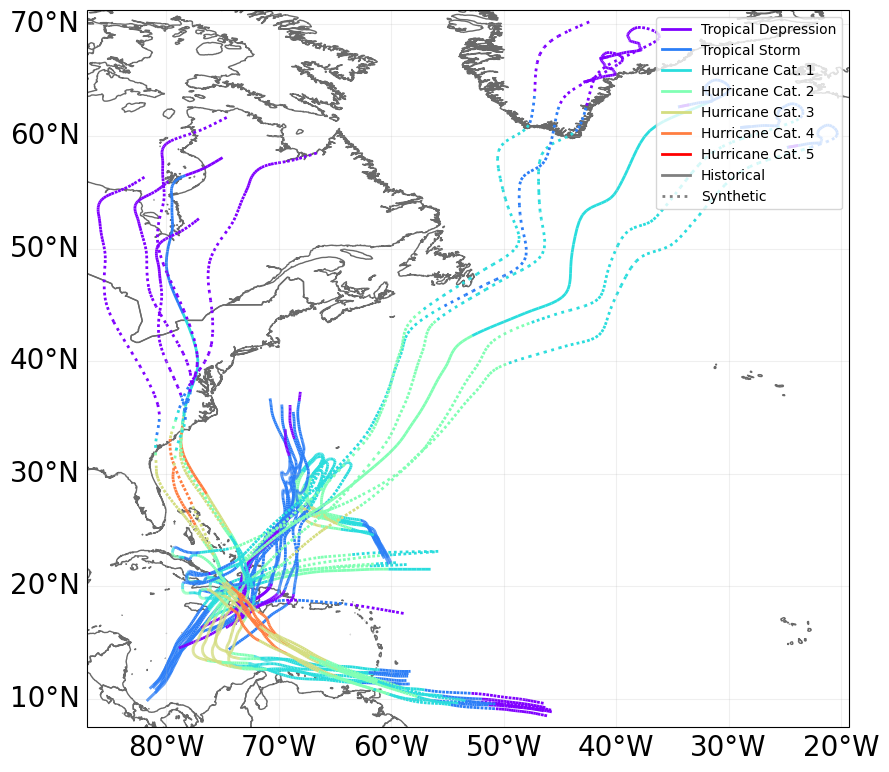

In [37]:
tracks.equal_timestep()
tracks.calc_perturbed_trajectories(nb_synth_tracks=5)
tracks.plot()